# CSE-221710304038-N.Madhu Kumar

### Problem statement:
400 applicants have been surveyed as potential students for UCLA. The university weighs certain aspects of a student's education to determine their acceptance.

The objective is to explore what kind of data is provided, determine the most important factors that contribute to a student's chance of admission, and select the most accurate model to predict the probability of admission.


### Datasets and Inputs:

Given dataset containing various attributes of student information.The dataset that I am working is 
downloded from:https://www.kaggle.com/adepvenugopal/predicting-graduate-admissions-using-ml/data

 This dataset is created for prediction of graduate admissions and the dataset link is below:
- Features in the dataset:
- GRE Scores (290 to 340)
- TOEFL Scores (92 to 120)
- University Rating (1 to 5)
- Statement of Purpose (1 to 5)
- Letter of Recommendation Strength (1 to 5)
- Undergraduate CGPA (6.8 to 9.92)
- Research Experience (0 or 1)
- Chance of Admit (0.34 to 0.97)

### USES:
- To apply for a master's degree is a very expensive and intensive work. With this kernel, students will guess their capacities and they will decide whether to apply for a master's degree or not.

- So, basically this set is about the Graduate Admissions data i.e. Given a set of standardized scores like GRE, TOEFL, SOP standard scores, LOR standard scores, what is probability ( basically i have done a YES/NO scenario ) of gaining admission into a particular school. All those folks who are preparing for MS, might point out this question, from where did you get SOP & LOR scores. These aren’t public figures ? I mean yes, it might not be public, but dont you think universities might be grading these applications on some scale of rating so that the scores can be standardized. Hence the SOP, LOR scores.

### LOAD required packages

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Versions of packages
import numpy
import matplotlib
print('numpy:',numpy.__version__)
print('pandas:',pd.__version__)
print('seaborn:',sns.__version__)
print('matplotlib:',matplotlib.__version__)

numpy: 1.18.1
pandas: 1.0.1
seaborn: 0.10.0
matplotlib: 3.1.3


In [3]:
#Read the Data
df = pd.read_csv("Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(400, 9)

In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,400.0,200.500000,115.614301,1.00,100.75,200.50,300.2500,400.00
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


### Observations:

- The Average Score for GRE is 316.62
- The Average Score for TOEFL is 107.29
- The Average CGPA is 8.59
- The Average Number for Statement of Purpose is 3.0
- The Average Number for Recommendation letters among the students is 3.0
- The Average Number of Research done by students is  1.0
- The Average University Ratings of Different Students is  3.0

In [7]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [9]:
df.select_dtypes(exclude=['int','float']).columns #categorical

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating',
       'Research'],
      dtype='object')

In [10]:
df.select_dtypes(include=['int','float']).columns #numerical

Index(['SOP', 'LOR ', 'CGPA', 'Chance of Admit '], dtype='object')

In [11]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

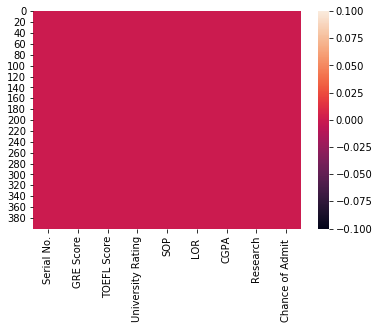

In [12]:
sns.heatmap(df.isnull())

In [13]:
df.nunique()

Serial No.           400
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64

### Visualization:


From these charts it looks like we have no missing values!

It seems as though Serial No. is just an index for students, which we can take out.

Two columns also have an added space in the label which we'll take out

We are also removing the blank sapces.

In [14]:
df.rename(columns = {'Chance of Admit ':'Chance of Admit', 'LOR ':'LOR'}, inplace=True)
df.drop(labels='Serial No.', axis=1, inplace=True)

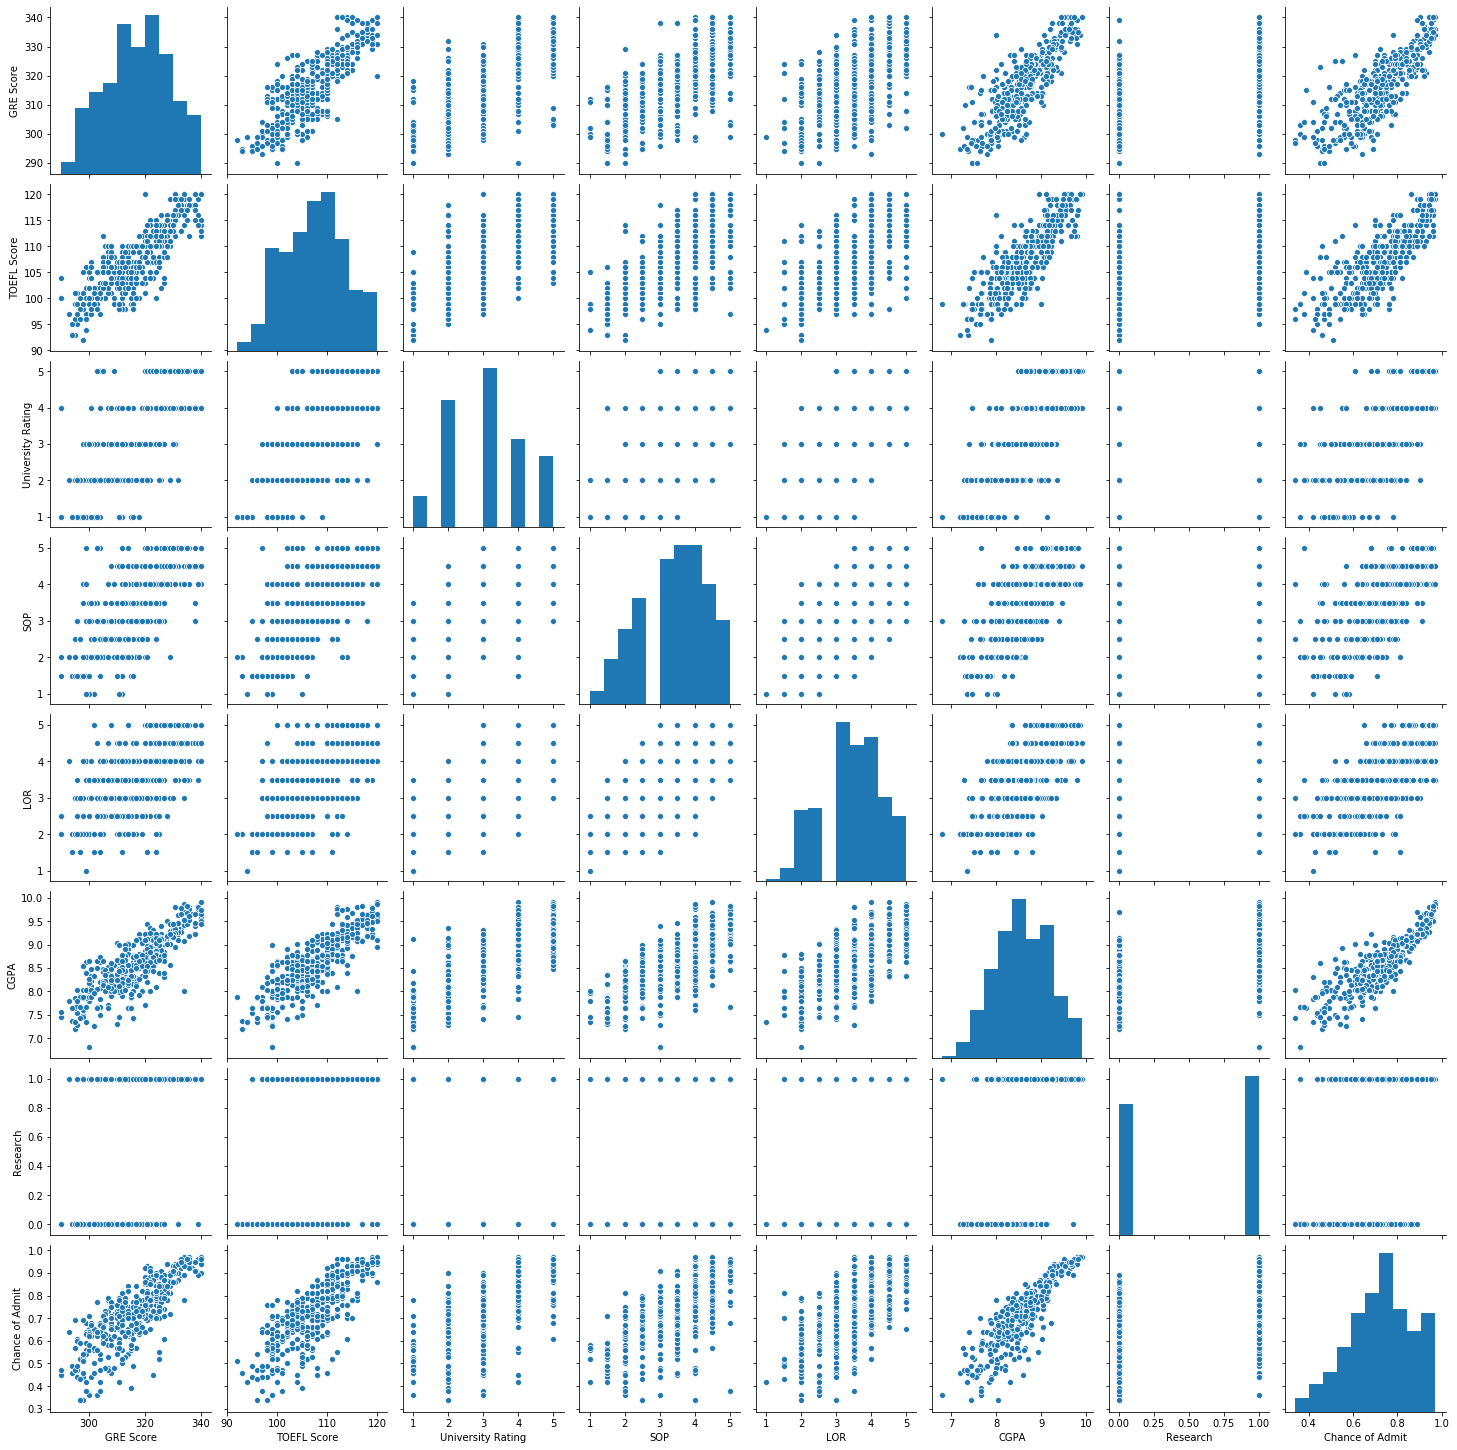

In [15]:
#The relationship between the features found in the data is observed.
sns.pairplot(df)

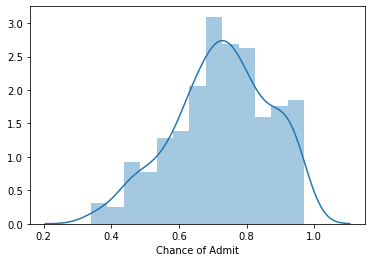

In [16]:
#Visualization of Distribution of Chance of Admit
sns.distplot(df['Chance of Admit'])

In [17]:
#finding correlation
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


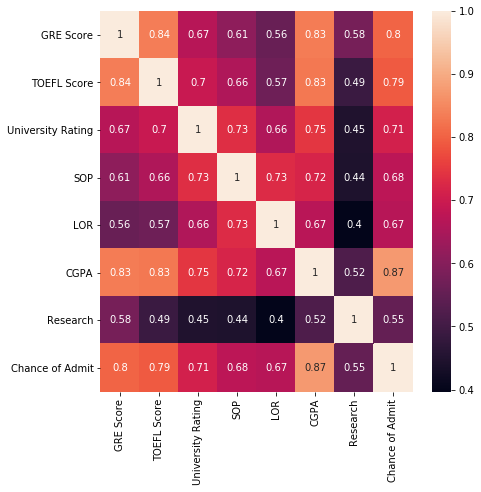

In [18]:
#HeatMap of Correlation
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True)

The top three features that affect the Chance to Admit are:

 1.CGPA
 
 2.GRE Score
 
 3.TOEFL Score

### CGPA
The Cumulative Grade Point Average is a 10 point grading system.

From the data shown below, it appears the submissions are normally distributed. With a mean of 8.6 and standard deviation of 0.6.

### CGPA vs Chance of Admit
It appears as applicant's CGPA has a strong correlation with their chance of admission.

Text(0.5, 1.0, 'CGPA vs Chance of Admit')

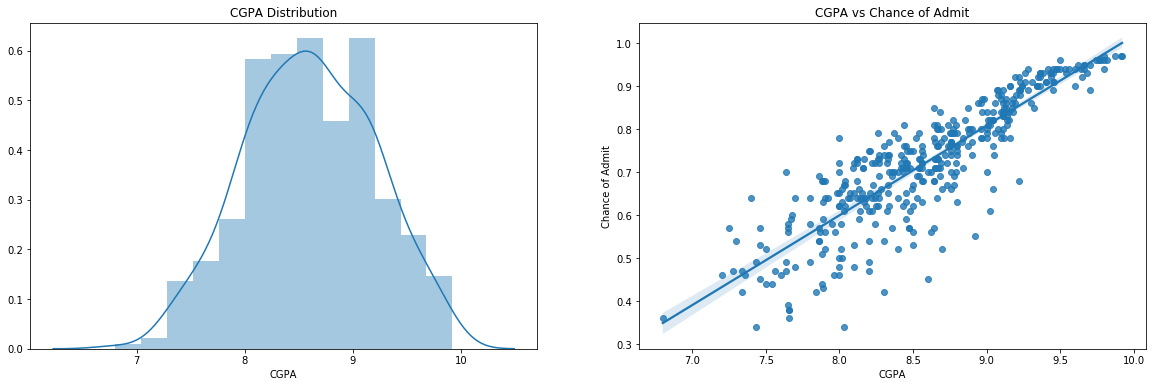

In [19]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['CGPA'])
plt.title('CGPA Distribution')

plt.subplot(1,2,2)
sns.regplot("CGPA","Chance of Admit",data =df)
plt.title('CGPA vs Chance of Admit')

### GRE Score
The Graduate Record Examination is a standarized exam, often required for admission to graduate and MBA programs globally. It's made up of three components:

1.Analytical Writing (Scored on a 0-6 scale in half-point increments)

2.Verbal Reasoning (Scored on a 130-170 scale)

3.Quantitative Reasoning (Scored on a 130-170 scale)

In this dataset, the GRE Score is based on a maximum of 340 points. The mean is 317 with a standard deviation of 11.5.

### GRE Score vs Chance of Admit
GRE scores have a strong correlation with the chance of admission however not as strong as one's CGPA.

Text(0.5, 1.0, 'GRE Scores vs Chance of Admit')

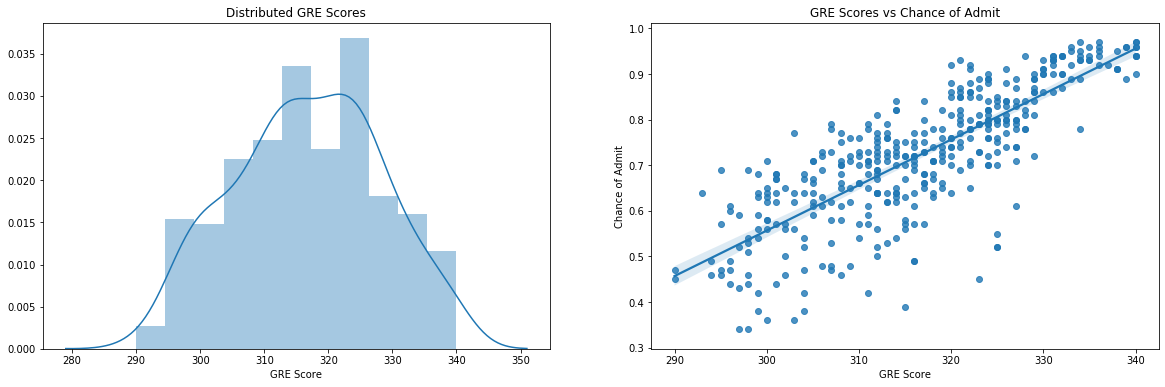

In [20]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['GRE Score'])
plt.title('Distributed GRE Scores')

plt.subplot(1,2,2)
sns.regplot(df['GRE Score'], df['Chance of Admit'])
plt.title('GRE Scores vs Chance of Admit')

### TOEFL Score
The Test of English as a Foreign Language is a standarized test for non-native English speakers that are choosing to enroll in English-speaking universities.

The test is split up into 4 sections:

1.Reading

2.Listening

3.Speaking

4.Writing

All sections are scored out of 30, giving the exam a total score of 120 marks. In this dataset, the TOEFL scores have a mean of 107 and a standard deviation of 6.

### TOEFL Score vs Chance of Admit
Like GRE scores, the scores received for the TOEFL strongly correlate to an applicants chance of admission.

Text(0.5, 1.0, 'TOEFL Scores vs Chance of Admit')

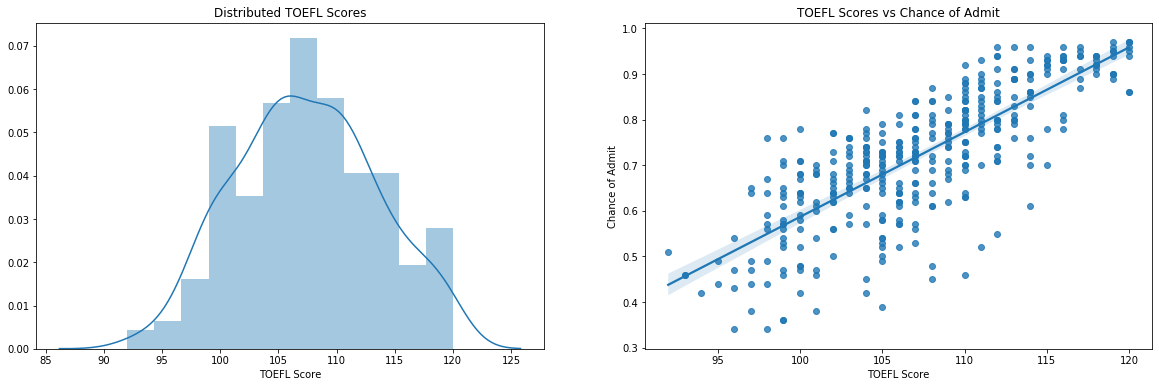

In [21]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['TOEFL Score'])
plt.title('Distributed TOEFL Scores')

plt.subplot(1,2,2)
sns.regplot(df['TOEFL Score'], df['Chance of Admit'])
plt.title('TOEFL Scores vs Chance of Admit')

 I want to explore the data a little bit further regarding research and university rankings. Even though they hold a lower importance in the chance of admission, it would be nice to understand their characteristics in the dataset.
### Research

It seems the majority of applicants have research experience. However, this is the least important feature, so it doesn't matter all too much if an applicant has the experience or not.

[Text(0, 0, 'No Research Experience'), Text(0, 0, 'Has Research Experience')]

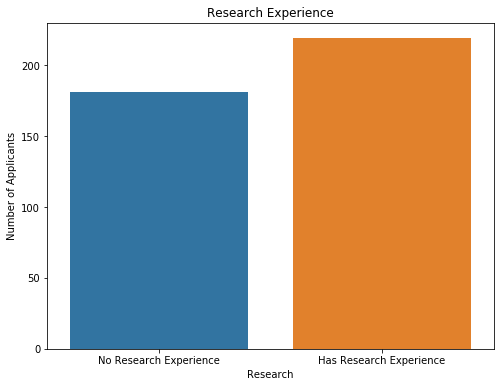

In [22]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df['Research'])
plt.title('Research Experience')
plt.ylabel('Number of Applicants')
ax.set_xticklabels(['No Research Experience', 'Has Research Experience'])


### University Rating
Let's see the distribution of applicants coming from each kind of university.

Most applicants come from a tier 3 and tier 2 university.

Text(0, 0.5, 'Number of Applicants')

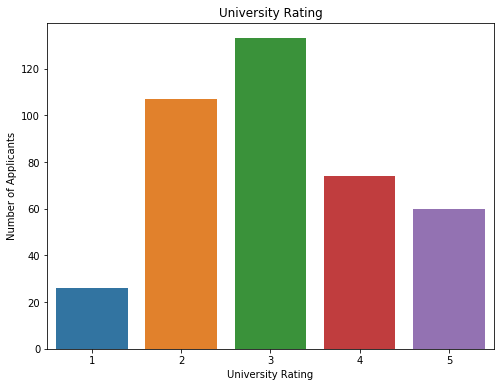

In [23]:
plt.subplots(figsize=(8,6))
sns.countplot(df['University Rating'])
plt.title('University Rating')
plt.ylabel('Number of Applicants')

### Train and Test the Model:
- Now that we understand our dataset, it's time to implement machine learning methods to predict future applicant's chances of admission.

- First we have to prepare our data, by splitting it into training and testing data. We'll also scale our data, from 0 to 1, to receive more accurate predictions.

- After completion of preprocessing steps, the data splits into training and testing datasets to train the model and check its accuracy. We will be using one or more regression algorithms. We use algorithms like Decision Trees, Linear regression,Random forest.

In [24]:
#splitting of input and output
X=df.drop(columns = {'Chance of Admit'})
y=df['Chance of Admit']

Scaling is not required in this model because,it is Regression problem.If we perform scaling the values may not differ in high range that is slight changes may occur

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [26]:
# No scaling is required here 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trains = scaler.fit_transform(X_train)
X_tests = scaler.fit_transform(X_test)

## Linear Regression

In [27]:
#Build the model on Training data
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
#Predicting on training data
y_train_pred=lm.predict(X_train)
y_train_pred


array([0.74604196, 0.73901061, 0.99499641, 0.71465428, 0.58666289,
       0.70570088, 0.79635618, 0.72390065, 0.91430317, 0.65782685,
       0.60293691, 0.84357917, 0.49457813, 0.72066904, 0.61590143,
       0.63303675, 0.73458027, 0.77284896, 0.54224384, 0.7740777 ,
       0.67388358, 0.68770413, 0.71751013, 0.79218791, 0.74689676,
       0.60135562, 0.6550291 , 0.65024192, 0.64937148, 0.61847543,
       0.71837168, 0.62572932, 0.56180503, 0.58932197, 0.82917531,
       0.60765804, 0.45309083, 0.88506537, 0.772133  , 0.81857796,
       0.62930747, 0.705755  , 0.6604701 , 0.44720981, 0.9565852 ,
       0.79082941, 0.7826623 , 0.65632426, 0.6477194 , 0.8045823 ,
       0.84099099, 0.74010959, 0.78838667, 0.77642522, 0.78917766,
       0.72812151, 0.80688713, 0.68670226, 0.80746179, 0.82580413,
       0.65525331, 0.76625765, 0.55463779, 0.712791  , 0.62615089,
       0.9370158 , 0.62973414, 0.7734889 , 0.79633318, 0.64020192,
       0.71136299, 0.73601668, 0.78718114, 0.89732183, 0.73342

In [29]:
#checking the R2 score,RMSE
#performance score of train data
from sklearn.metrics import r2_score, mean_squared_error
lr_r2 = r2_score(y_train, y_train_pred)
lr_mse = mean_squared_error(y_train, y_train_pred)
lr_rmse = np.sqrt(lr_mse)
print('Linear Regression R2 Score: {0} \nLinear Regression MSE: {1}, \nLinear Regression RMSE:{2}'.format(lr_r2, lr_mse, lr_rmse))

Linear Regression R2 Score: 0.7951946003191085 
Linear Regression MSE: 0.0038704218434173236, 
Linear Regression RMSE:0.062212714483595104


In [30]:
#predicting on test data
y_test_pred=lm.predict(X_test)
y_test_pred


array([0.65117446, 0.72368741, 0.93536809, 0.82164316, 0.58158673,
       0.92863016, 0.52682366, 0.54308993, 0.65940583, 0.83834924,
       0.72008833, 0.90749769, 0.55354476, 0.89008648, 0.70389539,
       0.68664473, 0.66657268, 0.48196096, 0.69057217, 0.97493132,
       0.58802433, 0.65286881, 0.71150098, 0.53528647, 0.94677007,
       0.80982947, 0.69459383, 0.56495613, 0.68192423, 0.81039878,
       0.80796481, 0.94640983, 0.64599494, 0.51104918, 0.65983663,
       0.66907811, 0.71572271, 0.64556878, 0.61540702, 0.87367833,
       0.74275261, 0.59782649, 0.77456683, 0.95944897, 0.85124125,
       0.83554825, 0.94662422, 0.64822919, 0.92247594, 0.85906183,
       0.89624998, 0.72869743, 0.78874783, 0.95142703, 0.57325803,
       0.58744723, 0.68621316, 0.84544646, 0.60495144, 0.84808919,
       0.66642894, 0.65524969, 0.70024808, 0.51206905, 0.62930376,
       0.7173701 , 0.62200838, 0.84170334, 0.85675802, 0.79886217,
       0.72196478, 0.81448203, 0.87373609, 0.83332085, 0.52554

In [37]:
#performance score of test data
from sklearn.metrics import r2_score, mean_squared_error
lrt_r2 = r2_score(y_test, y_test_pred)
lrt_mse = mean_squared_error(y_test, y_test_pred)
lrt_rmse = np.sqrt(lrt_mse)
print('Linear Regression R2 Score: {0} \nLinear Regression MSE: {1}, \nLinear Regression RMSE:{2}'.format(lrt_r2, lrt_mse, lrt_rmse))

Linear Regression R2 Score: 0.8212082591486991 
Linear Regression MSE: 0.004617003377285011, 
Linear Regression RMSE:0.06794853476922819


In [56]:
#Adjusted R2 score:
print('Adjusted R^2:', 1- (1-r2_score(y_test, y_test_pred))*(len(X_test)-1)/
                                  (len(X_test)-X_test.shape[1]-1))


Adjusted R^2: 0.803825728788156


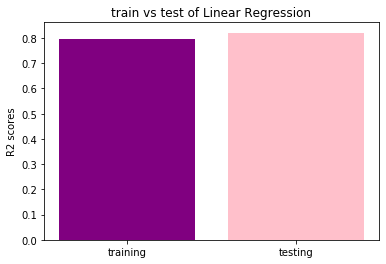

In [41]:
models=['training','testing']
r2_scores = [0.7951946003191085,0.8212082591486991]
plt.bar(models,r2_scores,color=['purple','pink'])
plt.ylabel("R2 scores")
plt.title("train vs test of Linear Regression")
plt.show()

Here,Training score in model is 79%
And Testing score in model is 82%

Here the unseen data (test data) works better than the train data

## Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=110,max_depth=6,random_state=0)
rfc.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=110, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [33]:
#Predicting on the train data
y_train_predrfc = rfc.predict(X_train)
y_train_predrfc


array([0.77263302, 0.70931641, 0.96801381, 0.73447202, 0.57632208,
       0.6576978 , 0.79450211, 0.70761958, 0.92774733, 0.65536507,
       0.61144151, 0.83800256, 0.49655427, 0.730508  , 0.65468292,
       0.65153334, 0.74799317, 0.77091131, 0.56333595, 0.73154497,
       0.68209279, 0.66360864, 0.71152136, 0.68943668, 0.74948325,
       0.62552045, 0.65971134, 0.65563498, 0.68277961, 0.63313705,
       0.7216467 , 0.60059002, 0.54924821, 0.5801375 , 0.84379947,
       0.60909339, 0.47060334, 0.92122731, 0.76750836, 0.78134272,
       0.65669777, 0.69887813, 0.65487145, 0.45797155, 0.96410024,
       0.80311695, 0.75974317, 0.6761548 , 0.67759376, 0.80700703,
       0.83865571, 0.76093853, 0.7687912 , 0.78270671, 0.75794359,
       0.72953913, 0.80774246, 0.71115835, 0.81374301, 0.81987993,
       0.64619693, 0.77468249, 0.56694449, 0.72234153, 0.67722607,
       0.94320662, 0.5825776 , 0.7624346 , 0.81339585, 0.67691512,
       0.71976877, 0.72906178, 0.80594072, 0.91667516, 0.64350

In [34]:
#performance score of train data
from sklearn.metrics import r2_score, mean_squared_error
rfcr2 = r2_score(y_train, y_train_predrfc)
rfcmse = mean_squared_error(y_train, y_train_predrfc)
rfcrmse = np.sqrt(rfcmse)
print('R2 Score: {0} \nMSE: {1}, \nRMSE:{2}'.format(rfcr2, rfcmse, rfcrmse))

R2 Score: 0.906390038230045 
MSE: 0.0017690453540795885, 
RMSE:0.042060020852105966


In [35]:
#Predicting on the test data
y_predict = rfc.predict(X_test)
y_predict


array([0.65817431, 0.71485347, 0.94245793, 0.81953751, 0.56017767,
       0.91773995, 0.56072246, 0.47121671, 0.67531898, 0.89273045,
       0.72893669, 0.9415423 , 0.54450146, 0.9023252 , 0.70614543,
       0.67882662, 0.67331511, 0.47762955, 0.69812662, 0.95789722,
       0.62325026, 0.67179179, 0.70504994, 0.54635312, 0.94455377,
       0.81464888, 0.70206895, 0.5757044 , 0.69405616, 0.80389842,
       0.80676483, 0.94444097, 0.66035064, 0.46682334, 0.6880707 ,
       0.68551536, 0.71054248, 0.67662579, 0.6394156 , 0.92172516,
       0.7482541 , 0.64078054, 0.76875822, 0.94882349, 0.86800583,
       0.83392058, 0.96183459, 0.66350656, 0.92838824, 0.88151913,
       0.90983639, 0.70381116, 0.76764391, 0.94249585, 0.57313909,
       0.58116567, 0.68205658, 0.83959588, 0.59550628, 0.87121405,
       0.66265191, 0.64933046, 0.67981991, 0.46994044, 0.6633742 ,
       0.66254792, 0.61590754, 0.83431109, 0.87877618, 0.76716237,
       0.68729806, 0.81910823, 0.92015675, 0.8596229 , 0.55062

In [36]:
#performance score of test data
from sklearn.metrics import r2_score, mean_squared_error
rfctr2 = r2_score(y_test, y_predict)
rfctmse = mean_squared_error(y_test, y_predict)
rfctrmse = np.sqrt(rfctmse)
print('R2 Score: {0} \nMSE: {1}, \nRMSE:{2}'.format(rfctr2, rfctmse, rfctrmse))

R2 Score: 0.8183993845316527 
MSE: 0.004689537955960314, 
RMSE:0.06848020119684459


In [57]:
#Adjusted R2 score:
print('Adjusted R^2:', 1- (1-r2_score(y_test, y_predict))*(len(X_test)-1)/
                                  (len(X_test)-X_test.shape[1]-1))

Adjusted R^2: 0.8007437691388968


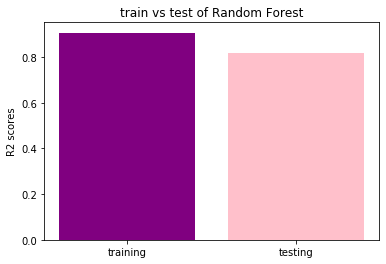

In [40]:
models=['training','testing']
r2_scores = [0.906390038230045,0.8183993845316527]
plt.bar(models,r2_scores,color=['purple','pink'])
plt.ylabel("R2 scores")
plt.title("train vs test of Random Forest")
plt.show()

Here, in Random Forest the training data score is 90% and the testing data score is 81%

### Decision tree

In [44]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor(random_state=0, max_depth=6)
dec_tree.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [45]:
#predicting on train data
y_tpredictd = dec_tree.predict(X_train)
y_tpredictd

array([0.7646875 , 0.71241379, 0.965     , 0.7646875 , 0.55705882,
       0.67333333, 0.80909091, 0.71241379, 0.925     , 0.64      ,
       0.6145    , 0.8324    , 0.49      , 0.71241379, 0.655     ,
       0.655     , 0.7646875 , 0.7646875 , 0.55705882, 0.72333333,
       0.67971429, 0.655     , 0.71241379, 0.61      , 0.775     ,
       0.6145    , 0.62166667, 0.67971429, 0.67971429, 0.6145    ,
       0.71241379, 0.55705882, 0.55705882, 0.6145    , 0.8324    ,
       0.6145    , 0.49      , 0.925     , 0.7646875 , 0.8324    ,
       0.67971429, 0.71241379, 0.6975    , 0.49      , 0.965     ,
       0.8324    , 0.7646875 , 0.67971429, 0.67971429, 0.8324    ,
       0.8324    , 0.72333333, 0.7646875 , 0.8       , 0.7646875 ,
       0.71241379, 0.80909091, 0.71241379, 0.80909091, 0.8324    ,
       0.655     , 0.8       , 0.55705882, 0.71241379, 0.67971429,
       0.935     , 0.606     , 0.7646875 , 0.78      , 0.67971429,
       0.737     , 0.7646875 , 0.80909091, 0.925     , 0.67971

In [48]:
#performance score of train data
from sklearn.metrics import r2_score, mean_squared_error
dcr2 = r2_score(y_train, y_tpredictd)
dcmse = mean_squared_error(y_train, y_tpredictd)
dcrmse = np.sqrt(dcmse)
print('R2 Score: {0} ,\nMSE: {1}, \nRMSE:{2}'.format(dcr2, dcmse,dcrmse))

R2 Score: 0.8812650216479114 ,
MSE: 0.0022438590706477537, 
RMSE:0.04736938959547351


In [50]:
#predicting on test data
y_testpredictd = dec_tree.predict(X_test)
y_testpredictd

array([0.54      , 0.7646875 , 0.935     , 0.8324    , 0.465     ,
       0.925     , 0.465     , 0.38      , 0.67971429, 0.91      ,
       0.775     , 0.935     , 0.49      , 0.88      , 0.71241379,
       0.737     , 0.67971429, 0.49      , 0.67971429, 0.965     ,
       0.62166667, 0.67971429, 0.71241379, 0.55705882, 0.9475    ,
       0.80909091, 0.67971429, 0.6145    , 0.67971429, 0.80909091,
       0.80909091, 0.9475    , 0.6145    , 0.49      , 0.737     ,
       0.71241379, 0.71241379, 0.67971429, 0.67971429, 0.925     ,
       0.7646875 , 0.6975    , 0.7646875 , 0.9475    , 0.882     ,
       0.8324    , 0.965     , 0.655     , 0.935     , 0.91      ,
       0.925     , 0.67971429, 0.7646875 , 0.9475    , 0.7       ,
       0.6145    , 0.737     , 0.8324    , 0.465     , 0.882     ,
       0.655     , 0.606     , 0.67333333, 0.49      , 0.67971429,
       0.67971429, 0.6145    , 0.8324    , 0.88      , 0.8324    ,
       0.67971429, 0.8324    , 0.925     , 0.882     , 0.55705

In [52]:
#performance score of test data
from sklearn.metrics import r2_score, mean_squared_error
dctr2 = r2_score(y_test, y_testpredictd)
dctmse = mean_squared_error(y_test, y_testpredictd)
dctrmse = np.sqrt(dctmse)
print('R2 Score: {0} ,\nMSE: {1}, \nRMSE:{2}'.format(dctr2, dctmse,dctrmse))

R2 Score: 0.7302776364703218 ,
MSE: 0.0069651375249012715, 
RMSE:0.08345739946164912


In [58]:
#Adjusted R2 score:
print('Adjusted R^2:', 1- (1-r2_score(y_test, y_testpredictd))*(len(X_test)-1)/
                                  (len(X_test)-X_test.shape[1]-1))

Adjusted R^2: 0.7040546289049365


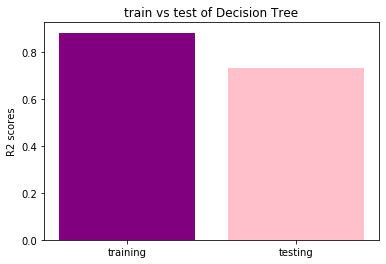

In [54]:
models=['training','testing']
r2_scores = [0.8812650216479114,0.7302776364703218]
plt.bar(models,r2_scores,color=['purple','pink'])
plt.ylabel("R2 scores")
plt.title("train vs test of Decision Tree")
plt.show()

Best among the Linear regression, Random forest,Decision tree

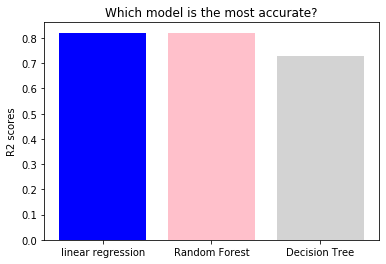

In [53]:
model = ['linear regression','Random Forest','Decision Tree']
R2_scores = [0.8212082591486991,0.8183993845316527,0.7302776364703218]
plt.bar(model, R2_scores, color=['blue', 'pink', 'lightgrey'])
plt.ylabel("R2 scores")
plt.title("Which model is the most accurate?")
plt.show()

Linear Regression shows the best score among model so we choose Linear Regression for predicting the Chance of Admit in this model

In [55]:
#making predictions using linear regression on test data
y_test_pred=lm.predict(X_test)
y_test_pred

array([0.65117446, 0.72368741, 0.93536809, 0.82164316, 0.58158673,
       0.92863016, 0.52682366, 0.54308993, 0.65940583, 0.83834924,
       0.72008833, 0.90749769, 0.55354476, 0.89008648, 0.70389539,
       0.68664473, 0.66657268, 0.48196096, 0.69057217, 0.97493132,
       0.58802433, 0.65286881, 0.71150098, 0.53528647, 0.94677007,
       0.80982947, 0.69459383, 0.56495613, 0.68192423, 0.81039878,
       0.80796481, 0.94640983, 0.64599494, 0.51104918, 0.65983663,
       0.66907811, 0.71572271, 0.64556878, 0.61540702, 0.87367833,
       0.74275261, 0.59782649, 0.77456683, 0.95944897, 0.85124125,
       0.83554825, 0.94662422, 0.64822919, 0.92247594, 0.85906183,
       0.89624998, 0.72869743, 0.78874783, 0.95142703, 0.57325803,
       0.58744723, 0.68621316, 0.84544646, 0.60495144, 0.84808919,
       0.66642894, 0.65524969, 0.70024808, 0.51206905, 0.62930376,
       0.7173701 , 0.62200838, 0.84170334, 0.85675802, 0.79886217,
       0.72196478, 0.81448203, 0.87373609, 0.83332085, 0.52554

### Conclusion:
Based on important factors that contribute to a student's chance of admission, and selected the most accurate model and predicted the probability of admission.